<b><h3><u>Data Description:</u></h3></b><p>
The data at hand contains medical costs of people characterized by certain
attributes.<p>
<b><h3><u>Domain:</u></h3></b><p>
Healthcare<p>
<b><h3><u>Context:</u></h3></b><p>
Leveraging customer information is paramount for most businesses. In the case
of an insurance company, attributes of customers like the ones mentioned
below can be crucial in making business decisions. Hence, knowing to explore
and generate value out of such data can be an invaluable skill to have.
<b><h3><u>Attribute Information:</u></h3></b><p>
<b>age:</b> age of primary beneficiary<br>
<b>sex:</b> insurance contractor gender, female, male<br>
<b>bmi:</b> Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^
2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
<b>children:</b> Number of children covered by health insurance / Number of
dependents<br>
<b>smoker:</b> Smoking<br>
<b>region:</b> the beneficiary's residential area in the US, northeast, southeast,
southwest, northwest.<br>
<b>charges:</b> Individual medical costs billed by health insurance.<p>
<b><h3><u>Learning Outcomes:</u></h3></b><p>
<li> Exploratory Data Analysis
<li> Practicing statistics using Python
<li> Hypothesis testing


<b><h3>Importing libraries

In [294]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as stats
import numpy as np
from pandas.api.types import is_numeric_dtype
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from seaborn_qqplot import QQPlot
from matplotlib import pyplot as plt
from scipy.stats import gamma
sns.set(color_codes=True)
%matplotlib inline

<b><h3>Reading the data in a dataframe

In [2]:
insurance_data = pd.read_csv("insurance.csv")

In [5]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
insurance_data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


<b><h3>Exploratory Data Analysis

<b><h5>Shape of the data

In [8]:
insurance_data.shape

(1338, 7)

<b>Conclusion:</b>The data has 1338 rows of data and 7 columns

<b><h5>Data type of each attribute

In [11]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<b>Conclusion: </b>From datatypes we can conclude that sex, smoker and region are categorical attributes while age, bmi, children and charges are continous numerical attributes

<b><h5>Check for null values

In [21]:
insurance_data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [23]:
insurance_data.isnull().values.any()

False

<b>Conclusion: </b> We can observe from the above panda query that there are no null values under any of the columns in our dataset.

<b><h5>5 point summary for each numerical column

In [42]:
for column in insurance_data.columns:
    if is_numeric_dtype(insurance_data[column]):
        print("For column '{}':".format(column))
        print("min = {}".format(insurance_data[column].min()))
        print("Q1 = {}".format(insurance_data[column].quantile(0.25)))
        print("Q2 = {}".format(insurance_data[column].quantile(0.5)))
        print("Q3 = {}".format(insurance_data[column].quantile(0.75)))
        print("max = {}\n".format(insurance_data[column].max()))
        print("*"*100)

For column 'age':
min = 18
Q1 = 27.0
Q2 = 39.0
Q3 = 51.0
max = 64

****************************************************************************************************
For column 'bmi':
min = 15.96
Q1 = 26.29625
Q2 = 30.4
Q3 = 34.69375
max = 53.13

****************************************************************************************************
For column 'children':
min = 0
Q1 = 0.0
Q2 = 1.0
Q3 = 2.0
max = 5

****************************************************************************************************
For column 'charges':
min = 1121.8739
Q1 = 4740.28715
Q2 = 9382.033
Q3 = 16639.912515
max = 63770.42801

****************************************************************************************************


In [38]:
#--------------------Cross verifying------------------#
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<b><h5>Distribution plots

<b>For age

Text(0.5, 1.0, 'Distribution of age')

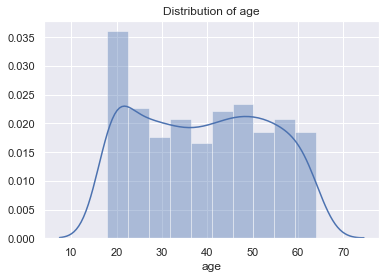

In [347]:
sns.distplot(insurance_data['age'],bins=10).set_title("Distribution of age")

In [132]:
age_mean = insurance_data['age'].mean()
print("Mean of Age = {}".format(age_mean))

Mean of Age = 39.20702541106129


In [133]:
age_median = insurance_data['age'].median()
print("Median of Age = {}".format(age_mean))

Median of Age = 39.20702541106129


In [136]:
age_mode = insurance_data['age'].mode().values[0]
print("Mode of age = {}".format(age_mode))

Mode of age = 18


In [139]:
insurance_data[(insurance_data['age'] == 18)].shape[0]

69

In [141]:
insurance_data.loc[(insurance_data['age'] >= 18) & (insurance_data['age'] < 22)].shape[0]/insurance_data.shape[0]

0.14499252615844543

<b>Conclusion: </b> From the distribution plot above we can draw following insights:<br><li>Average age of the patients availing services of the insurance company is 39.<li>Count of patients aged 18 is highest i.e 69<li>As per the distribution plot we can conclude that most number of patients availing the services are within the range of 18 and 22

<b>For BMI

Text(0.5, 1.0, 'Distribution of BMI')

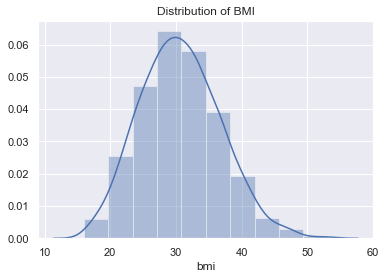

In [346]:
sns.distplot(insurance_data['bmi'],bins=10).set_title("Distribution of BMI")

In [143]:
bmi_mean = insurance_data['bmi'].mean()
print("Mean of BMI = {}".format(bmi_mean))

Mean of BMI = 30.663396860986538


In [144]:
bmi_median = insurance_data['bmi'].median()
print("Median of BMI = {}".format(bmi_median))

Median of BMI = 30.4


In [150]:
bmi_mode = insurance_data['bmi'].mode()
print("Mode of BMI = {}".format(bmi_mode.values[0]))

Mode of BMI = 32.3


In [152]:
insurance_data[(insurance_data['bmi'] == 32.3)].shape[0]

13

In [146]:
bmi_std = insurance_data['bmi'].std()
print("Standard deviation of BMI = {}".format(bmi_std))

Standard deviation of BMI = 6.098186911679017


In [147]:
print("mean - standard deviation = {}".format(bmi_mean - bmi_std))

mean - standard deviation = 24.565209949307523


In [148]:
print("mean + standard_deviation = {}".format(bmi_mean + bmi_std))

mean + standard_deviation = 36.76158377266555


In [149]:
(insurance_data.loc[(insurance_data['bmi'] >= bmi_mean - bmi_std) \
                   & (insurance_data['bmi'] <= bmi_mean + bmi_std)]\
                    .shape[0]/insurance_data.shape[0])*100 

66.96562032884903

<b>Conclusion: </b> The BMI data in the dataset is normally distributed where mean median and mode are almost equal to 30.<br>
We can draw following insights from the bmi distribution:
<ul><li>The average BMI of the patients availing the services of the insurance company is around 30.
    <li>Around 67% of the patients have the BMI between 24.5 and 36.7
    <li>Count of patients with BMI 32.3 is the highes i.e 13

<b>For Charges

Text(0.5, 1.0, 'Distribution of Charges')

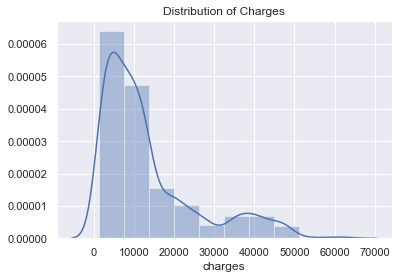

In [345]:
sns.distplot(insurance_data['charges'],bins=10).set_title("Distribution of Charges")

In [155]:
charges_mean = insurance_data['charges'].mean()
print("Mean of Chrages = {}".format(charges_mean))

Mean of Chrages = 13270.422265141257


In [158]:
charges_median = insurance_data['charges'].median()
print("Median of Charges = {}".format(charges_median))

Median of Charges = 9382.033


In [160]:
charges_mode = insurance_data['charges'].mode()
print("Mode of Charges = {}".format(charges_mode.values[0]))

Mode of Charges = 1639.5631


In [162]:
(insurance_data.loc[(insurance_data['charges'] >= 1000) \
                   & (insurance_data['charges'] <= 10000)]\
                    .shape[0]/insurance_data.shape[0])*100 

53.21375186846039

<b>Conclusion: </b> 
We can draw following insights from the charges distribution:<br>

<ul><li>The charges data is not normally distributed but is right skewed.
    <li>The average charges billed by the insurance company for the patients is around 13270
    <li>Around 53 % of the patients have to pay the bills in the range of 1000 to 10000

<b><h5>Measure of skewness

<b>Skewness in BMI

In [163]:
insurance_data['bmi'].skew()

0.2840471105987448

<b>BMI Kurtosis

In [164]:
insurance_data['bmi'].kurtosis()

-0.05073153135467834

<b>Conclusions:</b><li>The BMI of the dataset is not skewed since it is normally distributed as evident from the distplot hence skewness is close to 0<li>Due to this reason the excess kurtosis measure is close to 0

<b>Skewness in Age

In [165]:
insurance_data['age'].skew()

0.05567251565299186

<b>Age Kurtosis

In [166]:
insurance_data['age'].kurtosis()

-1.2450876526418673

<b>Conclusions:</b><li>The Age of the dataset is not skewed since its skewness measure is aprroximately 0 <li>But the excess kurtosis of this distribution is -1.24 i.e it has low kurtosis. It means that the tails of this data is less extreme than 3 standard deviations of a typical normal distibution. This is the reason that even though the skewness of the data is 0 the distribution is not normal.

<b>Skewness in Charges

In [169]:
insurance_data['charges'].skew()

1.5158796580240388

<b>Charges Kurtosis

In [170]:
insurance_data['charges'].kurtosis()

1.6062986532967907

<b>Conclusions:</b><li>The Charges have the skewness score of 1.5 i.e it is right skewed.This means that our charges data is likely to have outliers <li>The excess kurtosis of this distribution is also 1.6 which shows that the tails are more extreme than the typical 3 standard deviations in a normal distibution with the same mean.

<b><h5>Presence of Outliers

<b>BMI

Text(0.5, 1.0, 'BMI Boxplot')

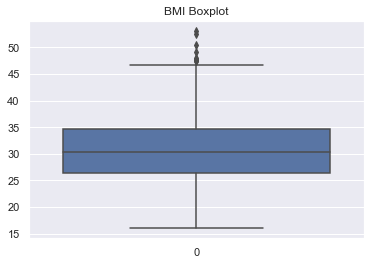

In [344]:
sns.boxplot(data=insurance_data['bmi']).set_title("BMI Boxplot")

<b>Observation:</b>As evident from the plot above, the bmi data does have the outliers and they are present beyond the upper whisker in our plot.

<b>Finding the outlier data

In [201]:
Q1 = insurance_data['bmi'].quantile(0.25)#----Calculating 25 percentile of our data
Q2 = insurance_data['bmi'].quantile(0.50)#----Calculating 50 percentile of our data
Q3 = insurance_data['bmi'].quantile(0.75)#----Calculating 75 percentile of our data
#-----Calculation inter quantile range---------#
IQR = Q3-Q1
#------Calculation upper and lower whiskers limit beyond which we will discover outliers------#
upper_whisker = Q3 + 1.5*IQR
lower_whisker = Q1 - 1.5*IQR
#-------Finding Outlier BMIs-----------#
outliers = insurance_data['bmi'][(insurance_data['bmi'] > upper_whisker) | (insurance_data['bmi'] < lower_whisker)]

In [202]:
print("Count of Outliers = {} ".format(len(outliers)))
print("Outlier BMIs\n")
print(outliers)

Count of Outliers = 9 
Outlier BMIs

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


<b>Observation:</b> The values correspond to outlier BMIs which are beyond the upper whisker of the boxplot.

<b>AGE

Text(0.5, 1.0, 'Age Boxplot')

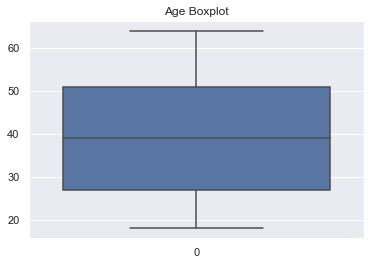

In [343]:
sns.boxplot(data=insurance_data['age']).set_title("Age Boxplot")

<b>Observation:</b>As evident from the plot above, the age data does not have the outliers. Let us confirm it mathematically below.

<b>Finding the outlier data

In [199]:
Q1 = insurance_data['age'].quantile(0.25)#----Calculating 25 percentile of our data
Q2 = insurance_data['age'].quantile(0.50)#----Calculating 50 percentile of our data
Q3 = insurance_data['age'].quantile(0.75)#----Calculating 75 percentile of our data
#-----Calculation inter quantile range---------#
IQR = Q3-Q1
#------Calculation upper and lower whiskers limit beyond which we will discover outliers------#
upper_whisker = Q3 + 1.5*IQR
lower_whisker = Q1 - 1.5*IQR
#-------Finding Outlier BMIs-----------#
outliers = insurance_data['age'][(insurance_data['age'] > upper_whisker) | (insurance_data['age'] < lower_whisker)]

In [200]:
print("Count of Outliers = {} ".format(len(outliers)))
print("Outlier Age\n")
print(outliers)

Count of Outliers = 0 
Outlier Age

Series([], Name: age, dtype: int64)


<b>Observation:</b> As we can see above our age data is free from outliers

<b>CHARGES

Text(0.5, 1.0, 'Charges Boxplot')

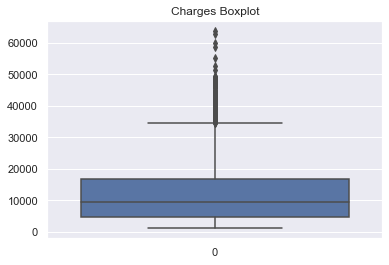

In [342]:
sns.boxplot(data=insurance_data['charges']).set_title("Charges Boxplot")

<b>Observation:</b>As evident from the plot above, the Charges data does have the outliers and they are present beyond the upper whisker in our plot.

<b>Finding the outlier data

In [309]:
Q1 = insurance_data['charges'].quantile(0.25)#----Calculating 25 percentile of our data
Q2 = insurance_data['charges'].quantile(0.50)#----Calculating 50 percentile of our data
Q3 = insurance_data['charges'].quantile(0.75)#----Calculating 75 percentile of our data
#-----Calculation inter quantile range---------#
IQR = Q3-Q1
#------Calculation upper and lower whiskers limit beyond which we will discover outliers------#
upper_whisker = Q3 + 1.5*IQR
lower_whisker = Q1 - 1.5*IQR
#-------Finding Outlier BMIs-----------#
outliers = insurance_data['charges'][(insurance_data['charges'] > upper_whisker) | (insurance_data['charges'] < lower_whisker)]

In [310]:
print("Count of Outliers = {} ".format(len(outliers)))
print("Outlier Charges\n")
print(outliers)

Count of Outliers = 139 
Outlier Charges

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


<b>Observation:</b> The values correspond to outlier Charges which are beyond the upper and the lower whisker of the boxplot. As evident from the plot the outliers are beyond the upper whisker.

<b><h5>Distribution of Categorical Columns

<b>Column : Sex

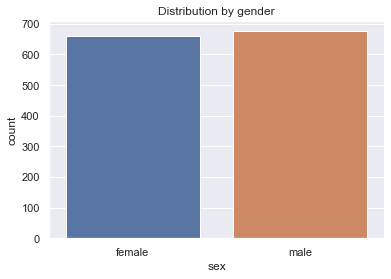

In [341]:
ax = sns.countplot(insurance_data['sex']).set_title("Distribution by gender")

In [230]:
print("Percentage of Female patients billed by Insurance company:")
(insurance_data[insurance_data['sex'] == 'female'].shape[0]/insurance_data.shape[0])*100

Percentage of Female patients billed by Insurance company:


49.47683109118087

In [231]:
print("Percentage of Male patients billed by Insurance company:")
(insurance_data[insurance_data['sex'] == 'male'].shape[0]/insurance_data.shape[0])*100

Percentage of Male patients billed by Insurance company:


50.52316890881914

<b>Observations:</b>From above we can conclude that the number of Males and Female patients billed by Insurance company is almost same

<b>Column : Children

Text(0.5, 1.0, 'Number of children')

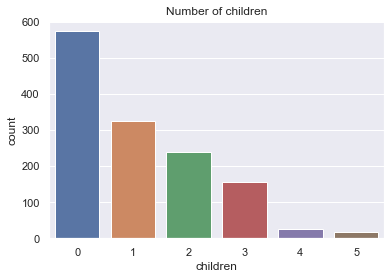

In [340]:
sns.countplot(insurance_data['children']).set_title("Number of children")

In [220]:
print("Percentage of patients with no children:")
(insurance_data[insurance_data['children'] == 0].shape[0]/insurance_data.shape[0])*100

Percentage of patients with no children:


42.89985052316891

<b>Observations:</b>From above we can conclude that most of the patients that have been billed by the insurance company are without children. While we have very few patients with 4 or 5 children

<b>Column : Smoker

Text(0.5, 1.0, 'Distribution by smoking habit')

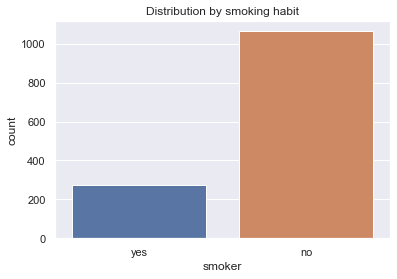

In [338]:
sns.countplot(insurance_data['smoker']).set_title("Distribution by smoking habit")

In [227]:
print("Percentage of patients who are smokers:")
(insurance_data[insurance_data['smoker'] == 'yes'].shape[0]/insurance_data.shape[0])*100

Percentage of patients who are smokers:


20.47832585949178

In [228]:
print("Percentage of patients who are non smokers:")
(insurance_data[insurance_data['smoker'] == 'no'].shape[0]/insurance_data.shape[0])*100

Percentage of patients who are non smokers:


79.52167414050822

<b>Observations:</b>Surprisingly 79.5% of the patients who are billed by the insurance company are non smokers while only 20.4% have the smoking history

Text(0.5, 1.0, 'Distribution by region')

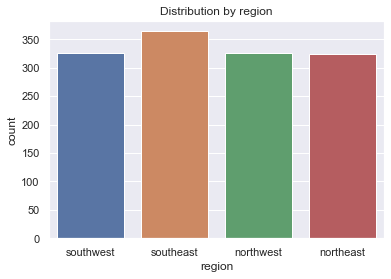

In [337]:
sns.countplot(insurance_data['region']).set_title("Distribution by region")

<b>Observations:</b>As per the distribution plot above number of patients from Southeast who are billed by the insurance company are slightly more thant the number of patients who belong to the other regions.

<b><h5>Pairplots corressponding to all columns in the dataset

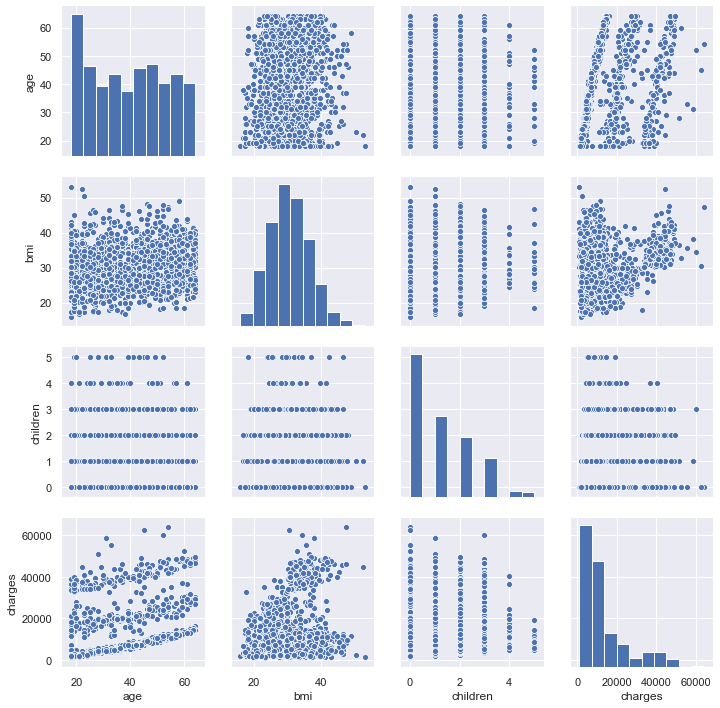

In [234]:
sns.pairplot(insurance_data)

<b>Observations:</b><li>This pairplot shows the plot between all the numerical data in our datasets.<li>The diagonal data represents the distribution of the numerical features. We can deduce that bmi data is normally distributed while children and charges data are right skewed.<li>We can also deduce that charges and age might have a positive correlation while the other pairs do not show any signs of any correlation

<b>Plotting pairplots with respect to categorical features 

<b>Category : Sex

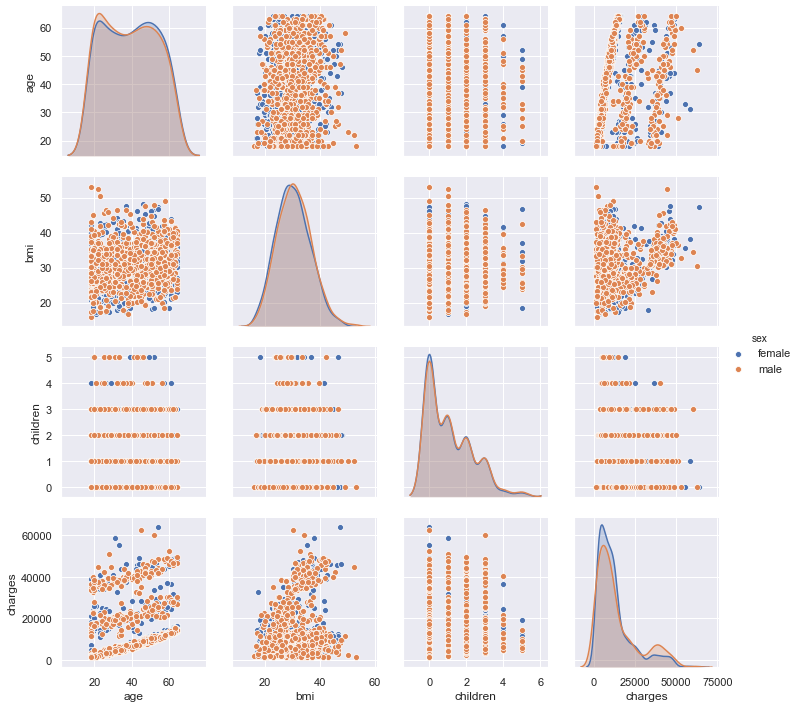

In [236]:
sns.pairplot(insurance_data, hue= 'sex')

<b>Observation:</b>We do not observe any noticeable difference in the distributions and plots with respect to the first plot.

<b>Category : Smoker

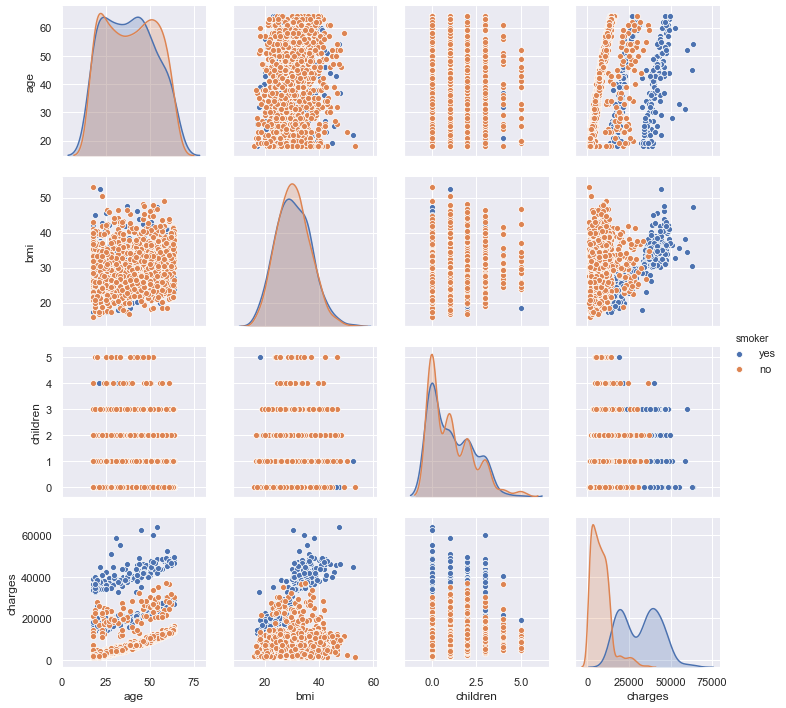

In [237]:
sns.pairplot(insurance_data, hue= 'smoker')

<b>Observations:</b><li>In this pairplot the only difference we could observe is that the charges data for non smokers is more peaked and is right skewed while for smokers it is less peaked and is not skewed.<li>This explains that even though the count of non smokers getting billed by Insurance company is more but their bill amount is lower than that of the smokers.

<b>Category : Region

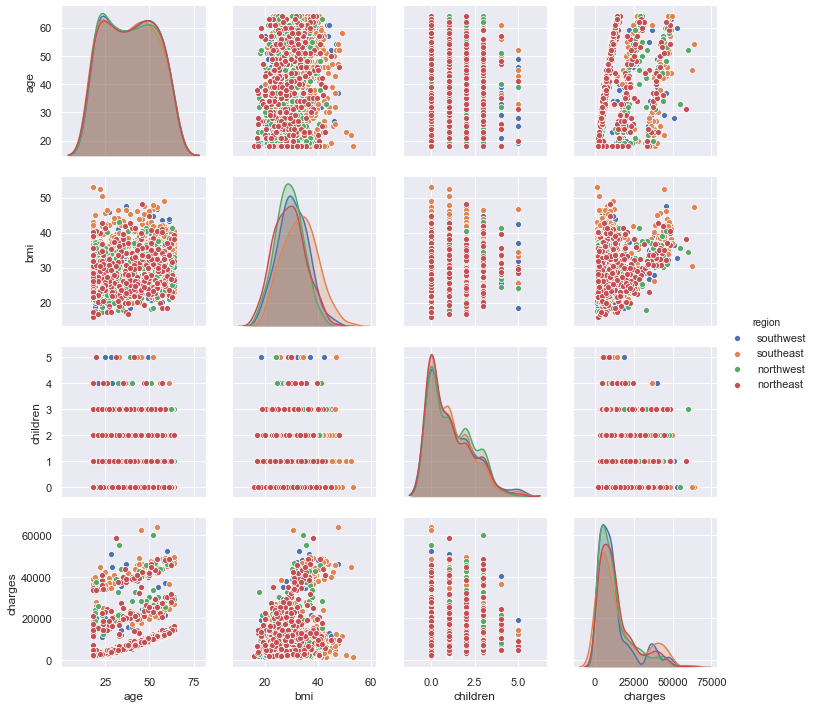

In [335]:
sns.pairplot(insurance_data, hue= 'region')

<b>Observations:</b>This pairplot more or less shows the same trend as that of the pairplot which was created with hue as Sex

<b><h3>Statistical Inference

<b><h5>Do charges of people who smoke differ significantly from the people who don't?

In this particular scenario we are going to compare charges billed for the 2 independent groups of the people i.e smokers and non-smokers.<br>Hence, We are going to perform <b>Two Sampled t-test</b> and determine the correct hypothesis based on the p value we calculate.<p>
<b><i>Ho(Null Hypothesis) : Charges of people who smoke do not differ significantly from the people who don't<p>
<b>H1(Alternative Hypothesis) : Charges of people who smoke do differ significantly from the people who don't<p>
<b>Alpha(Significance Level) : 0.05

In [289]:
smokers = np.array(insurance_data[insurance_data['smoker'] == 'yes']['charges'])
non_smokers = np.array(insurance_data[insurance_data['smoker'] == 'no']['charges'])
alpha = 0.05 #-----assumed significance level
#-------T-test on the 2 groups---------------#
t_statistic, p_val = stats.ttest_ind(smokers, non_smokers)
print("Mean Charges of the smokers = {}".format(np.mean(smokers)))
print("Mean Charges of the non smokers = {}\n".format(np.mean(non_smokers)))
if p_val < alpha:
    print("""Conclusion: Since the p value {0} is significantly lower than the significance level {1} we Reject the Null Hypothesis.
We may conculde that the charges of the people who smoke do differ significantly from the people who do not smoke.\n"""\
    .format(p_val,alpha))
else:
    print("""Conclusion: Since the p value {0} is not lower than the significance level {1} we do not reject the Null Hypothesis.i.e
    We may conculde that the charges of the people who smoke do not differ significantly from the people who do not smoke."""\
    .format(p_val,alpha))

Mean Charges of the smokers = 32050.23183153284
Mean Charges of the non smokers = 8434.268297856204

Conclusion: Since the p value 8.271435842177219e-283 is significantly lower than the significance level 0.05 we Reject the Null Hypothesis.
We may conculde that the charges of the people who smoke do differ significantly from the people who do not smoke.



<b>Let's visualize the distribution to further confirm our hypthesis testing results

Text(0.5, 1.0, 'Distribution of charges of non smokers')

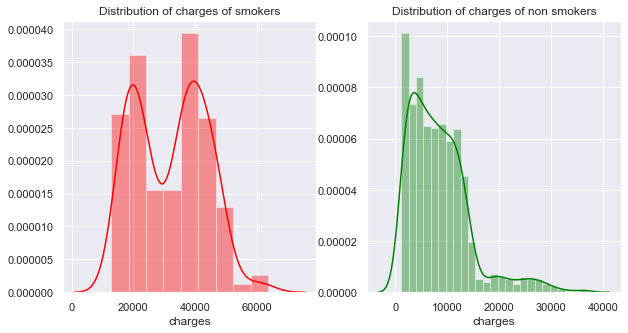

In [324]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(121)
sns.distplot(insurance_data[(insurance_data['smoker'] == 'yes')]['charges'], color = 'red', 
             ax = ax).set_title('Distribution of charges of smokers')

ax= fig.add_subplot(122)
sns.distplot(insurance_data[(insurance_data['smoker'] == 'no')]['charges'], color = 'green', 
             ax = ax).set_title('Distribution of charges of non smokers')

We can clearly see a significance difference in the distribution of the charges billed for smokers and non smokers.

<b><h5>Does bmi of males differ significantly from that of females?

In this particular scenario again,we are going to perform <b>Two Sampled t-test</b> and determine the correct hypothesis based on the p value we calculate.<p>
<b><i>Ho(Null Hypothesis) : BMI of males do not differ significantly from females<p>
<b>H1(Alternative Hypothesis) : BMI of males do differ significantly from females<p>
<b>Alpha(Significance Level) : 0.05

In [293]:
male_bmi = np.array(insurance_data[insurance_data['sex'] == 'male']['bmi'])
female_bmi = np.array(insurance_data[insurance_data['sex'] == 'female']['bmi'])
alpha = 0.05 #-----assumed significance level
#-------T-test on the 2 groups---------------#
t_statistic, p_val = stats.ttest_ind(male_bmi, female_bmi)
print("Mean BMI of the males = {}".format(np.mean(male_bmi)))
print("Mean BMI of the females = {}\n".format(np.mean(female_bmi)))
if p_val < alpha:
    print("""Conclusion: Since the p value {0} is significantly lower than the significance level {1} we Reject the Null Hypothesis.
    We may conculde that the BMI of males do differ significantly from females.\n"""\
    .format(p_val,alpha))
else:
    print("""Conclusion: Since the p value {0} is not lower than the significance level {1} we do not reject the Null 
Hypothesis i.e We may conculde that the BMI of males do not differ significantly from females."""\
    .format(p_val,alpha))

Mean BMI of the males = 30.943128698224854
Mean BMI of the females = 30.37774924471299

Conclusion: Since the p value 0.08997637178984932 is not lower than the significance level 0.05 we do not reject the Null 
Hypothesis i.e We may conculde that the BMI of males do not differ significantly from females.


<b>Let's visualize the distribution to further confirm our hypthesis testing results

Text(0.5, 1.0, 'Distribution of bmi of females')

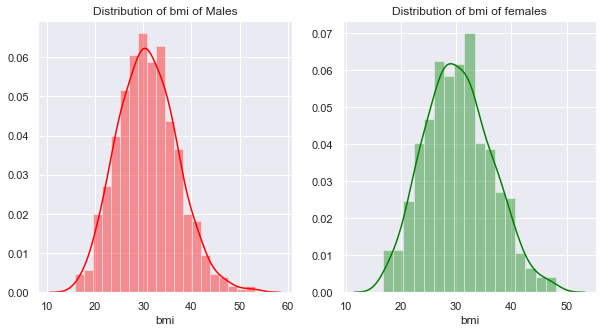

In [325]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(121)
sns.distplot(insurance_data[(insurance_data['sex'] == 'male')]['bmi'], color = 'red', 
             ax = ax).set_title('Distribution of bmi of Males')

ax= fig.add_subplot(122)
sns.distplot(insurance_data[(insurance_data['sex'] == 'female')]['bmi'], color = 'green', 
             ax = ax).set_title('Distribution of bmi of females')

We can clearly see that both the distributions are same and normally distributed with almost same mean and standard deviation.

<b><h5>Is the proportion of smokers significantly different in different
genders?

In this particular scenario we are going to compare proportions of smokers across different genders. Since both smokers and gender are categorical variables <br>Hence, We are going to perform <b>z-test</b> and determine the correct hypothesis based on the p value we calculate.<p>
<b><i>Ho(Null Hypothesis) : proportion of smokers not significantly different in different genders<p>
<b>H1(Alternative Hypothesis) :proportion of smokers significantly different in different genders<p>
<b>Alpha(Significance Level) : 0.05

In [307]:
male_smokers = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()[1]
female_smokers = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts()[1]
count_males = insurance_data[insurance_data['sex'] == 'male'].shape[0]
count_females = insurance_data[insurance_data['sex'] == 'female'].shape[0]
prop_males = (male_smokers/count_males)
prop_females = (female_smokers/count_females)
alpha = 0.05 #-----assumed significance level
print("Proportion of male smokers = {}".format(prop_males))
print("Proportion of female smokers = {}\n".format(prop_females))
#-------Performing Z-test---------------#
stat, p_val = proportions_ztest([male_smokers, female_smokers], [count_males, count_females])

if p_val < alpha:
    print("""Conclusion: Since the p value {0} is significantly lower than the significance level {1} we Reject 
            the Null Hypothesis.
            We may conculde that proportion of smokers is significantly different in different genders.\n"""\
    .format(p_val,alpha))
else:
    print("""Conclusion: Since the p value {0} is not lower than the significance level {1} we do not reject the 
    Null Hypothesis i.e We may conculde that proportion of smokers is significantly different in different genders."""\
    .format(p_val,alpha))

Proportion of male smokers = 0.23520710059171598
Proportion of female smokers = 0.17371601208459214

Conclusion: Since the p value 0.005324114164320532 is significantly lower than the significance level 0.05 we Reject 
            the Null Hypothesis.
            We may conculde that proportion of smokers is significantly different in different genders.



<b><h5>Is the distribution of bmi across women with no children, one child
and two children, the same?

In this particular scenario we are going to compare distribution of bmi i.e one continous variable across different categories of families i.e family having 0 , 1 or 2 children.<br>Here, We are going to perform <b>ANOVA test</b> and determine the correct hypothesis based on the p value we calculate.<p>
<b><i>Ho(Null Hypothesis) : Distribution of bmi across women with no children, one child and two children, is same<p>
<b>H1(Alternative Hypothesis) :Distribution of bmi across women with no children, one child and two children is not same<p>
<b>Alpha(Significance Level) : 0.05

In [316]:
zero_child = np.array(insurance_data[(insurance_data['sex']=='female') & \
                           (insurance_data['children'] == 0)]['bmi'])
one_child = np.array(insurance_data[(insurance_data['sex']=='female') & \
                           (insurance_data['children'] == 1)]['bmi'])
two_child = np.array(insurance_data[(insurance_data['sex']=='female') & \
                           (insurance_data['children'] == 2)]['bmi'])
#-----performing ANOVA test-------#
stat, p_val = stats.f_oneway(zero_child, one_child, two_child)

if p_val < alpha:
    print("""Conclusion: Since the p value {0} is lower than the significance level {1} we Reject 
            the Null Hypothesis.
            We may conculde that Distribution of bmi across women with no children, one child and two children is not same\n"""\
    .format(p_val,alpha))
else:
    print("""Conclusion: Since the p value {0} is not lower than the significance level {1} we fail to reject the 
             Null Hypothesis i.e Distribution of bmi across women with no children, one child and two children, is same."""\
    .format(p_val,alpha))

Conclusion: Since the p value 0.7158579926754841 is not lower than the significance level 0.05 we do not reject the 
             Null Hypothesis i.e Distribution of bmi across women with no children, one child and two children, is same.


<b>Let's visualize the distribution to further confirm our hypthesis testing results

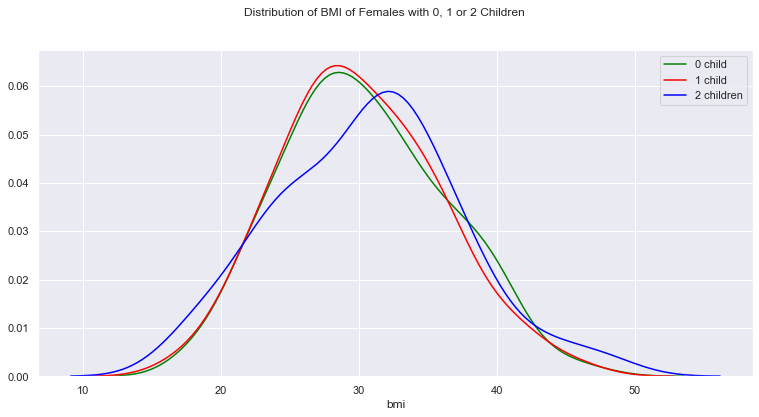

In [332]:
fig, ax_ = plt.subplots(figsize = (12.8, 6))

sns.distplot(insurance_data[(insurance_data['sex'] == 'female') & (insurance_data['children'] == 0)]['bmi'], 
             color = 'green', hist = False, label = '0 child')

sns.distplot(insurance_data[(insurance_data['sex'] == 'female') & (insurance_data['children'] == 1)]['bmi'], 
             color = 'red', hist = False, label = '1 child')

sns.distplot(insurance_data[(insurance_data['sex'] == 'female') & (insurance_data['children'] == 2)]['bmi'], 
             color = 'blue', hist = False, label = '2 children')

plt.suptitle('Distribution of BMI of Females with 0, 1 or 2 Children'); plt.legend(); plt.show()


We can clearly see that all 3 the distributions are almost same and seems to have been normally distributed. Hence our hypothesis of 3 distributions being the same is correct. 